In [15]:
%load_ext autoreload
%autoreload 2
%pip install --upgrade pip
%pip install matplotlib
%pip install torchvision
%pip install torch
%pip install keras
%pip install tensorflow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.28.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached 

  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dropout
import os
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 20)  
        self.fc2 = nn.Linear(20, 10) 
    def forward(self, x):
        x = x.view(-1, 28 * 28)  
        x = F.relu(self.fc1(x)) 
        x = self.fc2(x)  
        return x

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


model = SimpleNN()
criterion = nn.CrossEntropyLoss()  
optimizer = optim.SGD(model.parameters(), lr=0.01)  


n_epochs = 8
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

for epoch in range(n_epochs):
    running_loss = 0
    correct_train = 0
    total_train = 0
    
    model.train()
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
  
    model.eval()
    test_loss = 0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    test_loss = test_loss / len(testloader)
    test_accuracy = 100 * correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch + 1}/{n_epochs}, Train Loss: {train_loss}, Test Loss: {test_loss}, '
          f'Train Accuracy: {train_accuracy}%, Test Accuracy: {test_accuracy}%')




Epoch 1/8, Train Loss: 0.8167147535377982, Test Loss: 0.40563206659380796, Train Accuracy: 79.36333333333333%, Test Accuracy: 89.07%
Epoch 2/8, Train Loss: 0.3796209216372036, Test Loss: 0.33788794171136277, Train Accuracy: 89.20666666666666%, Test Accuracy: 90.19%
Epoch 3/8, Train Loss: 0.33554304641351773, Test Loss: 0.3139442381965127, Train Accuracy: 90.345%, Test Accuracy: 90.67%
Epoch 4/8, Train Loss: 0.3139721258505702, Test Loss: 0.2939647726928163, Train Accuracy: 90.95833333333333%, Test Accuracy: 91.59%
Epoch 5/8, Train Loss: 0.30055199064679744, Test Loss: 0.2878376411119844, Train Accuracy: 91.32166666666667%, Test Accuracy: 91.85%
Epoch 6/8, Train Loss: 0.2887342125097953, Test Loss: 0.27473015388011174, Train Accuracy: 91.68666666666667%, Test Accuracy: 92.12%
Epoch 7/8, Train Loss: 0.2792436888914055, Test Loss: 0.26585515246246083, Train Accuracy: 91.94%, Test Accuracy: 92.42%
Epoch 8/8, Train Loss: 0.27056489621144114, Test Loss: 0.2614072003894171, Train Accuracy: 92

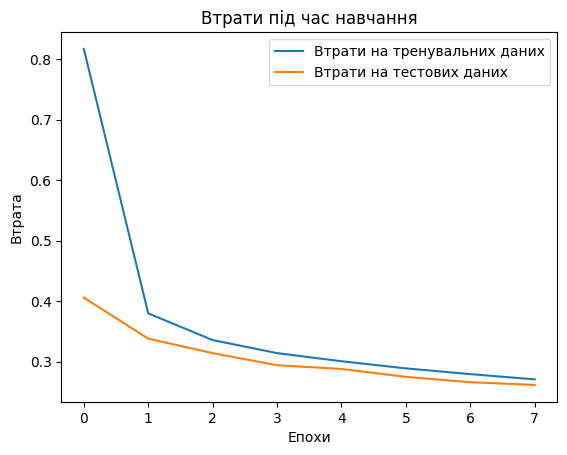

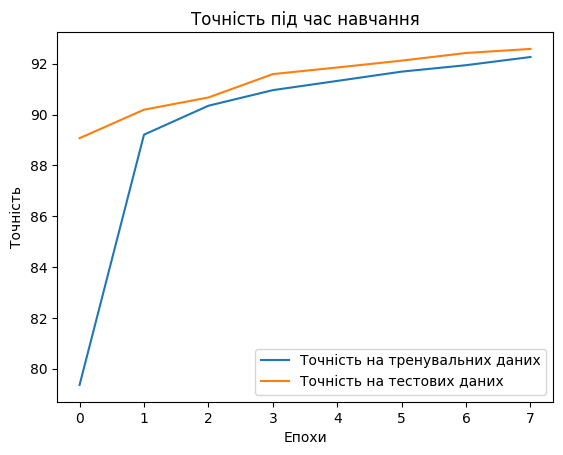

In [ ]:
plt.plot(train_losses, label='Втрати на тренувальних даних')
plt.plot(test_losses, label='Втрати на тестових даних')
plt.title('Втрати під час навчання')
plt.xlabel('Епохи')
plt.ylabel('Втрата')
plt.legend()
plt.show()

plt.plot(train_accuracies, label='Точність на тренувальних даних')
plt.plot(test_accuracies, label='Точність на тестових даних')
plt.title('Точність під час навчання')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

In [ ]:
os.environ["KERAS_BACKEND"] = "torch"
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

model = Sequential([
 Flatten(input_shape=(28, 28)),
 Dense(256, activation='relu'),
 Dense(128, activation='relu'),
 Dropout(0.5),
 Dense(64, activation='relu'),
 Dropout(0.3),
 Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  


history = model.fit(train_images, train_labels, batch_size = 32, epochs=8, validation_split=0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)


C:\Users\Дарина\OneDrive\Робочий стіл\3 курс 1 семестр\Машинне\Lab1\Lab1\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7689 - loss: 0.7174 - val_accuracy: 0.9585 - val_loss: 0.1399
Epoch 2/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9473 - loss: 0.1862 - val_accuracy: 0.9692 - val_loss: 0.1099
Epoch 3/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9680 - loss: 0.1198 - val_accuracy: 0.9728 - val_loss: 0.0977
Epoch 4/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9743 - loss: 0.0900 - val_accuracy: 0.9703 - val_loss: 0.1088
Epoch 5/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9777 - loss: 0.0789 - val_accuracy: 0.9737 - val_loss: 0.1091
Epoch 6/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9823 - loss: 0.0626 - val_accuracy: 0.9733 - val_loss: 0.0994
Epoch 7/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9834 - loss: 0.0586 - val_accuracy: 0.9751 - val_loss: 0.0935
Epoch 8/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9862 - loss: 0.0475 - val_ac

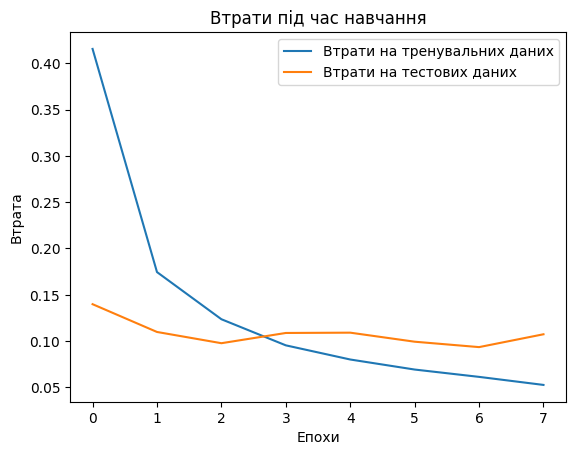

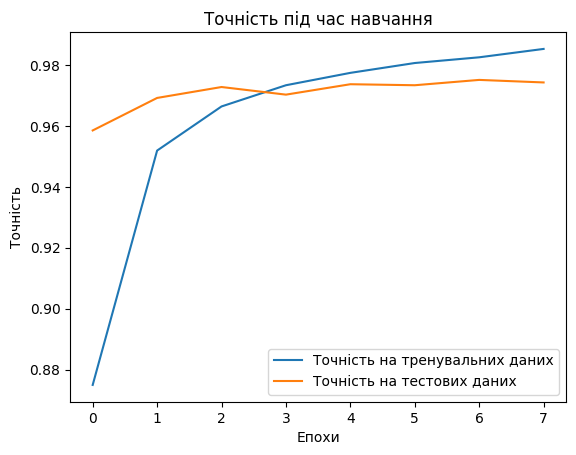

In [ ]:
plt.plot(history.history['loss'], label='Втрати на тренувальних даних')
plt.plot(history.history['val_loss'], label='Втрати на тестових даних')
plt.title('Втрати під час навчання')
plt.xlabel('Епохи')
plt.ylabel('Втрата')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Точність на тренувальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на тестових даних')
plt.title('Точність під час навчання')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


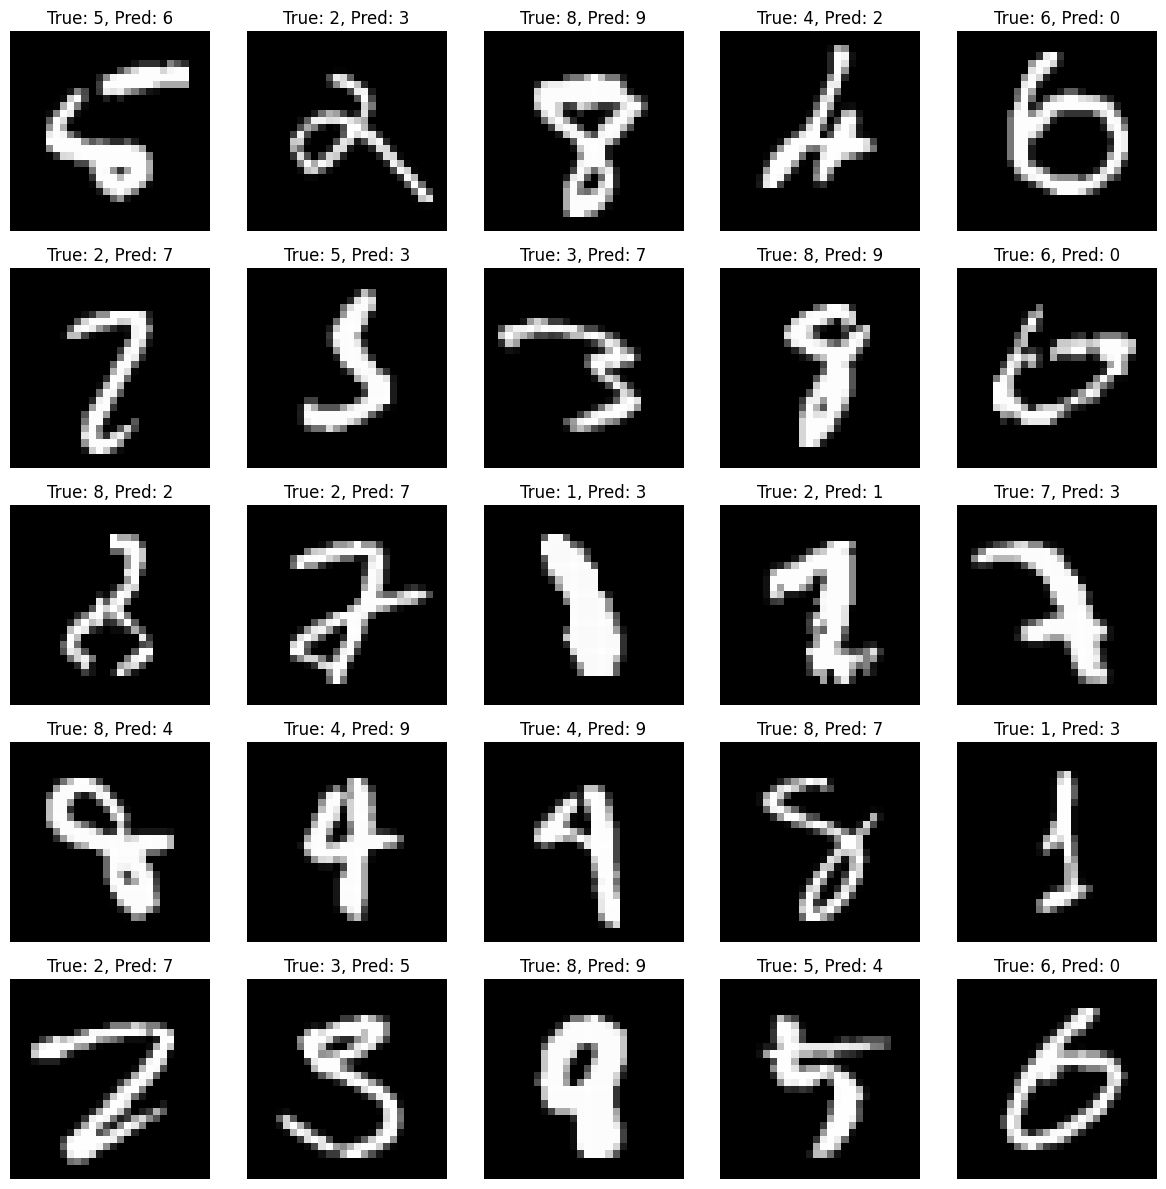

In [ ]:
predictions = model.predict(test_images)
predicted_classes = predictions.argmax(axis=1)

misclassified_images_keras = []
misclassified_labels_keras = []
predicted_labels_keras = []


for i in range(len(test_labels)):
    if predicted_classes[i] != test_labels[i]:
        misclassified_images_keras.append(test_images[i])
        misclassified_labels_keras.append(test_labels[i])
        predicted_labels_keras.append(predicted_classes[i])


plt.figure(figsize=(12, 12))
for i in range(min(25, len(misclassified_images_keras))):  
    plt.subplot(5, 5, i + 1)
    plt.imshow(misclassified_images_keras[i], cmap='gray')
    plt.title(f'True: {misclassified_labels_keras[i]}, Pred: {predicted_labels_keras[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
